In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

## Read in CSV

In [2]:
df = pd.read_csv('shots_data.csv')

In [3]:
df

,team,x,y,fgmade
0,Team A,-23.1,3.5,0
1,Team A,0.0,25.1,1
2,Team A,0.5,1.0,1
3,Team A,-5.6,5.2,0
4,Team A,4.0,14.5,1
...,...,...,...,...
555,Team B,7.8,24.7,0
556,Team B,10.1,1.4,1
557,Team B,-17.8,-0.1,0
558,Team B,22.6,2.9,0


## Adding Distance Column sqrt(x^2 + y^2)

In [4]:
distance = (df['x'] * df['x']) + (df['y'] * df['y'])
distance = np.sqrt(distance)
df = pd.concat([df, distance], axis = 1)
df

,team,x,y,fgmade,0
0,Team A,-23.1,3.5,0,23.363647
1,Team A,0.0,25.1,1,25.100000
2,Team A,0.5,1.0,1,1.118034
3,Team A,-5.6,5.2,0,7.641989
4,Team A,4.0,14.5,1,15.041609
...,...,...,...,...,...
555,Team B,7.8,24.7,0,25.902316
556,Team B,10.1,1.4,1,10.196568
557,Team B,-17.8,-0.1,0,17.800281
558,Team B,22.6,2.9,0,22.785302


## Printing off all shots location

(-5.0, 30.0)

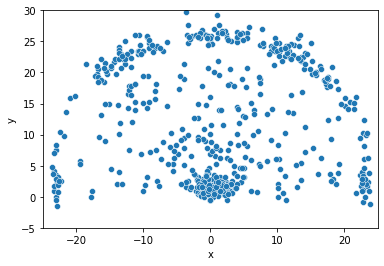

In [5]:
overall = sns.scatterplot(x = df['x'], y = df['y'])
overall.set_xlim(-25, 25)
overall.set_ylim(-5, 30)

## Shots Made

D:\alexa\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fgmade', ylabel='count'>

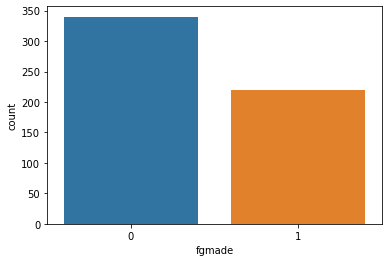

In [6]:
sns.countplot(df['fgmade'])

## Querying all Corner Shots

In [7]:
cornerPOS = df[df['x'] >= 22][df['y'] <= 7.8] #all shots shot past x 22 and less then y 7.8
cornerNEG = df[df['x'] <= -22][df['y'] <= 7.8] #all shots shot past x -22 and less then y 7.8
corner = pd.concat([cornerPOS, cornerNEG])
corner.head()

C:\Users\alexa\AppData\Local\Temp/ipykernel_19732/403790134.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cornerPOS = df[df['x'] >= 22][df['y'] <= 7.8] #all shots shot past x 22 and less then y 7.8
C:\Users\alexa\AppData\Local\Temp/ipykernel_19732/403790134.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cornerNEG = df[df['x'] <= -22][df['y'] <= 7.8] #all shots shot past x -22 and less then y 7.8


,team,x,y,fgmade,0
11,Team A,22.3,3.5,0,22.572993
22,Team A,22.5,1.8,1,22.571885
24,Team A,23.5,2.4,0,23.622235
92,Team A,22.8,3.6,1,23.082461
171,Team A,22.6,4.0,0,22.951253


## Plot of all Corner Shots

(-5.0, 30.0)

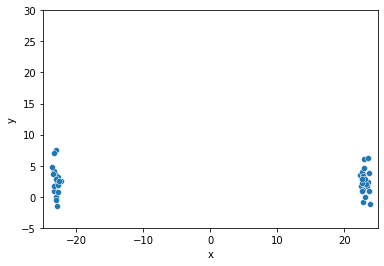

In [8]:
cornersPlot = sns.scatterplot(x = corner['x'], y = corner['y'])
cornersPlot.set_xlim(-25, 25)
cornersPlot.set_ylim(-5, 30)

## Querying all NonCorner Shots

In [9]:
noncorner = df[df[0] >= 23.75][df['y'] > 7.8] #where distance is greater than 23.75 and y is greater than 7.8
noncorner

C:\Users\alexa\AppData\Local\Temp/ipykernel_19732/3093124798.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  noncorner = df[df[0] >= 23.75][df['y'] > 7.8] #where distance is greater than 23.75 and y is greater than 7.8


,team,x,y,fgmade,0
1,Team A,0.0,25.1,1,25.100000
9,Team A,-16.8,20.5,1,26.504528
17,Team A,15.2,19.7,1,24.882323
18,Team A,2.3,26.2,0,26.300760
21,Team A,-16.9,19.7,0,25.955732
...,...,...,...,...,...
541,Team B,-10.3,23.0,0,25.200992
545,Team B,14.1,21.3,0,25.544080
552,Team B,10.3,22.7,1,24.927495
554,Team B,20.5,14.1,0,24.880916


## Plot of all NonCorner Shots (plus one pin spot)

(-5.0, 30.0)

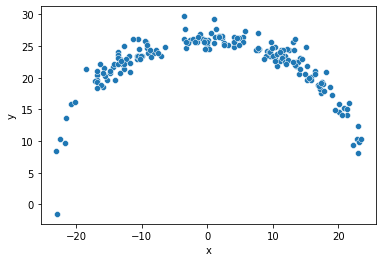

In [10]:
noncornerTEMP = noncorner.append(df.loc[508]) #I am appending this instance due to it having the lowest y shot
# Appending it to the df now lets us plot with ylim start at -5 (for prettiness reasons)
noncornerPlot = sns.scatterplot(x = noncornerTEMP['x'], y = noncornerTEMP['y'])
cornersPlot.set_xlim(-25, 25)
cornersPlot.set_ylim(-5, 30)

## Querying all 2 Point Shots

In [11]:
twoPoint = df[df[0] < 23.75][df['x'] < 22][df['x'] > -22]
print(twoPoint.describe())
twoPoint

                x           y      fgmade           0
count  333.000000  333.000000  333.000000  333.000000
mean     0.396396    6.012613    0.429429    8.570991
std      7.116398    6.042686    0.495740    7.063429
min    -19.500000   -0.600000    0.000000    0.223607
25%     -1.800000    1.500000    0.000000    2.193171
50%      0.300000    3.200000    0.000000    6.637017
75%      3.000000    9.600000    1.000000   14.684005
max     21.700000   21.900000    1.000000   23.231229


C:\Users\alexa\AppData\Local\Temp/ipykernel_19732/3065026034.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twoPoint = df[df[0] < 23.75][df['x'] < 22][df['x'] > -22]
C:\Users\alexa\AppData\Local\Temp/ipykernel_19732/3065026034.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twoPoint = df[df[0] < 23.75][df['x'] < 22][df['x'] > -22]


,team,x,y,fgmade,0
2,Team A,0.5,1.0,1,1.118034
3,Team A,-5.6,5.2,0,7.641989
4,Team A,4.0,14.5,1,15.041609
5,Team A,-13.6,4.0,1,14.176036
6,Team A,-9.0,7.2,1,11.525624
...,...,...,...,...,...
551,Team B,8.4,5.7,0,10.151355
553,Team B,1.1,2.3,1,2.549510
556,Team B,10.1,1.4,1,10.196568
557,Team B,-17.8,-0.1,0,17.800281


## Plot of All Two Point Shots

(-5.0, 30.0)

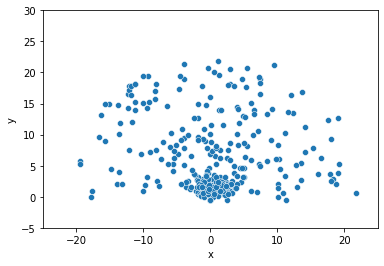

In [12]:
twoPointPlot = sns.scatterplot(x = twoPoint['x'], y = twoPoint['y'])
twoPointPlot.set_xlim(-25, 25)
twoPointPlot.set_ylim(-5, 30)

## Checking total instances queried and actual total instances

In [13]:
two = twoPoint['fgmade'].count()
non = noncorner['fgmade'].count()
cor = corner['fgmade'].count()
sumVal = two + non + cor
print("Sum: " + str(sumVal) +"\t DF: "+ str(df['fgmade'].count()))

Sum: 560	 DF: 560


#### They match!

## Shot Attempted Distribution

In [14]:
N = pd.DataFrame(noncorner['team'].value_counts())
C = pd.DataFrame(corner['team'].value_counts())
T = pd.DataFrame(twoPoint['team'].value_counts())
BN = int(N.loc['Team B'])
AN = int(N.loc['Team A'])
BC = int(C.loc['Team B'])
AC = int(C.loc['Team A'])
BT = int(T.loc['Team B'])
AT = int(T.loc['Team A'])

In [15]:
print("Noncorner Team B Shot Distribution: "+ str(BN/(BN + BC + BT)))
print("Noncorner Team A Shot Distribution: "+ str(AN/(AN + AC + AT)))
print("Corner Team B Shot Distribution: "+ str(BC/(BN + BC + BT)))
print("Corner Team A Shot Distribution: "+ str(AC/(AN + AC + AT)))
print("Two Point Team B Shot Distribution: "+ str(BT/(BN + BC + BT)))
print("Two Point Team A Shot Distribution: "+ str(AT/(AN + AC + AT)))

Noncorner Team B Shot Distribution: 0.34285714285714286
Noncorner Team A Shot Distribution: 0.32142857142857145
Corner Team B Shot Distribution: 0.075
Corner Team A Shot Distribution: 0.07142857142857142
Two Point Team B Shot Distribution: 0.5821428571428572
Two Point Team A Shot Distribution: 0.6071428571428571


## Team Shot Distribution within a Zone

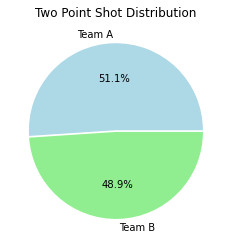

In [16]:
labels = twoPoint['team'].value_counts().index
distribution = twoPoint['team'].value_counts()

plt.pie(distribution, explode = (0.01, 0.01), labels = labels, autopct='%1.1f%%', colors = ['lightblue', 'lightgreen'], )
plt.title("Two Point Shot Distribution")
plt.show()

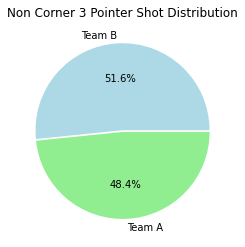

In [17]:
labels = noncorner['team'].value_counts().index
distribution = noncorner['team'].value_counts()

plt.pie(distribution, explode = (0.01, 0.01), labels = labels, autopct='%1.1f%%', colors = ['lightblue', 'lightgreen'], )
plt.title("Non Corner 3 Pointer Shot Distribution")
plt.show()

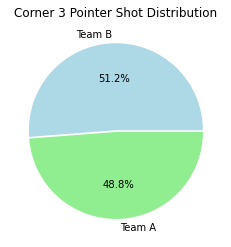

In [18]:
labels = corner['team'].value_counts().index
distribution = corner['team'].value_counts()

plt.pie(distribution, explode = (0.01, 0.01), labels = labels, autopct='%1.1f%%', colors = ['lightblue', 'lightgreen'], )
plt.title("Corner 3 Pointer Shot Distribution")
plt.show()

## eFG%

In [19]:
def eFG(df, isThreePointer):
    FG = df[df['fgmade'] == 1]['fgmade'].count()
    FGA = df['fgmade'].count()
    if(isThreePointer):
        PM = df[df['fgmade'] == 1]['fgmade'].count()
    else:
        PM = 0
    value = (FG + (0.5 * PM))/FGA
    return value

# I might have implemented this function incorrectly due to misunderstanding of the equation, but what I am thinking is that
# since we are calculating for each zone, the corner and noncorner shots will all be 3 pointers, and all 2 points shots will
# be 2 respecitvely. Since that is the case, when calculating for any 3 pointer section, the number of field goals made
# will equal the number of pointers made, since all fields goals made in corner or noncorner are all 3 pointers...

In [20]:
A_corner = corner[corner['team'] == 'Team A']
eFG(A_corner, True)

0.6

In [21]:
B_corner = corner[corner['team'] == 'Team B']
eFG(B_corner, True)

0.35714285714285715

In [22]:
A_noncorner = noncorner[noncorner['team'] == 'Team A']
eFG(A_noncorner, True)

0.48333333333333334

In [23]:
B_noncorner = noncorner[noncorner['team'] == 'Team B']
eFG(B_noncorner, True)

0.546875

In [24]:
B_twoPoint = twoPoint[twoPoint['team'] == 'Team B']
eFG(B_twoPoint, False)

0.4601226993865031

In [25]:
A_twoPoint = twoPoint[twoPoint['team'] == 'Team A']
eFG(A_twoPoint, False)

0.4